<a href="https://colab.research.google.com/github/git-bauerseb/deep-learning/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import tensorflow as tf

import cProfile

tf.executing_eagerly()

True

In [ ]:
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
    (tf.cast(mnist_images[..., tf.newaxis]/255, tf.float32),
     tf.cast(mnist_labels, tf.int64)
     ))

dataset = dataset.shuffle(1000).batch(32)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
mnist_model = tf.keras.Sequential([
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu',
                                                          input_shape=(None, None, 1)),
                                   tf.keras.layers.Conv2D(16, [3,3], activation='relu'),
                                   tf.keras.layers.GlobalAveragePooling2D(),
                                   tf.keras.layers.Dense(10)
])

In [ ]:
mnist_model.summary()

# Logit: Values used as input to softmax


for images, labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 16)    160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
_________________________________________________________________
Logits:  [[ 0.00121988 -0.04408433  0.02608965 -0.02081358 -0.03080192  0.02321623
   0.05760741  0.00467529  0.0275059  -0.04941407]]


In [ ]:
# Keras models have builtin training loop ('fit' method)
# More customization

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

def train_step(images, labels):
  # Use to inspect computes gradients
  with tf.GradientTape() as tape:
      logits = mnist_model(images, training=True)

      tf.debugging.assert_equal(logits.shape, (32,10))

      loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))


def train(epochs):
  for epoch in range(epochs):
    for (batch, (images, labels)) in enumerate(dataset):
      train_step(images, labels)

    print('Epoch {} finished'.format(epoch))

train(epochs=3)

Epoch 0 finished
Epoch 1 finished
Epoch 2 finished


Text(0, 0.5, 'Loss [Entropy]')

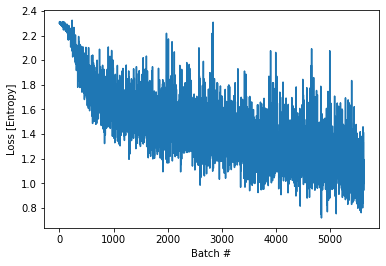

In [ ]:
import matplotlib.pyplot as plt


plt.plot(loss_history)
plt.xlabel("Batch #")
plt.ylabel("Loss [Entropy]")

In [ ]:
# Short

x = tf.ones((2,2))

with tf.GradientTape(persistent=True) as t:
  t.watch(x)

  y = tf.reduce_sum(x)
  z = tf.multiply(y,y)


dz_dx = t.gradient(z,x)
dz_dy = t.gradient(z,y)
print(dz_dy)
print(dz_dx)


del t

tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
####################
# START HERE       #